In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv(r"C:\Users\91867\Desktop\3.1-data-sheet-udemy-courses.csv")
df.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.1+ KB


In [4]:
df.isnull().sum()

course_id              4
course_title           4
url                    4
price                  4
num_subscribers        4
num_reviews            4
num_lectures           4
level                  4
Rating                 4
content_duration       4
published_timestamp    4
subject                3
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [7]:
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,2016-03-08T22:28:36Z,Subject: Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,1216340.0,Learn to Play Sweet Child of Mine,https://www.udemy.com/learn-to-play-sweet-chil...,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,2017-06-30T17:33:29Z,Musical Instruments
3676,1026762.0,Coaching Course: Rhythm Instruction for Music ...,https://www.udemy.com/coaching-bundle-rhythm-i...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,2017-03-10T17:06:46Z,Musical Instruments
3677,1223240.0,Learn Pirates of the Caribbean by Ear on the P...,https://www.udemy.com/learn-pirates-of-the-car...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,2017-05-22T17:14:43Z,Musical Instruments
3678,1224186.0,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,2017-05-30T00:19:02Z,Musical Instruments


In [8]:
df['level'].unique()

array(['Beginner Level', 'Expert Level', 'All Levels',
       'Intermediate Level'], dtype=object)

In [9]:
df["level"].value_counts()

All Levels            1925
Beginner Level        1271
Intermediate Level     422
Expert Level            58
Name: level, dtype: int64

In [10]:
df['subject'].unique()

array(['Subject: Web Development', 'Business Finance', 'Graphic Design',
       'Musical Instruments'], dtype=object)

In [11]:
df['course_title'].unique()

array(['Learn HTML5 Programming From Scratch',
       'Coding for Entrepreneurs Basic', 'The Web Developer Bootcamp',
       ..., 'Learn Pirates of the Caribbean by Ear on the Piano',
       'Learn to Play Piano Like a Pro - Easy Piano Course 1',
       '4 Week Rhythm Mastery'], dtype=object)

In [13]:
df.drop(['course_id', 'published_timestamp', 'url','course_title'], axis=1,inplace=True)

In [14]:
df

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,Subject: Web Development
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,Subject: Web Development
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,Subject: Web Development
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,Subject: Web Development
4,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,Subject: Web Development
...,...,...,...,...,...,...,...,...
3675,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,Musical Instruments
3676,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,Musical Instruments
3677,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,Musical Instruments
3678,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,Musical Instruments


In [16]:
df.describe()

,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
count,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,66.115343,3199.260881,156.309848,40.129761,0.610868,4.096137
std,61.056073,9486.582966,935.674518,50.398507,0.334287,6.054948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,112.000000,4.000000,15.000000,0.280000,1.000000
50%,45.000000,912.500000,18.000000,25.000000,0.760000,2.000000
75%,95.000000,2558.000000,67.000000,46.000000,0.930000,4.500000
max,200.000000,268923.000000,27445.000000,779.000000,1.000000,78.500000


In [17]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

# encode the 'subject' column
df['subject'] = le.fit_transform(df['subject'])

level_map = {
    'Beginner Level': 1,
    'Intermediate Level': 2,
    'Expert Level': 3,
    'All Levels': 4
}

df['level'] = df['level'].map(level_map)

In [18]:
df

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject
0,0.0,268923.0,8629.0,45.0,1,0.82,10.500000,3
1,0.0,161029.0,279.0,27.0,3,0.69,3.500000,3
2,200.0,121584.0,27445.0,342.0,1,0.89,43.000000,3
3,0.0,120291.0,5924.0,30.0,4,0.78,3.000000,3
4,200.0,114512.0,22412.0,304.0,1,0.55,30.500000,3
...,...,...,...,...,...,...,...,...
3675,20.0,0.0,0.0,23.0,4,0.31,1.500000,2
3676,125.0,0.0,0.0,7.0,1,0.06,0.633333,2
3677,20.0,0.0,0.0,6.0,4,0.08,0.533333,2
3678,35.0,0.0,0.0,13.0,1,0.78,0.516667,2


Outliers checking

In [19]:
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)
upper_threshold = df['price'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['price'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)

207.5 -92.5


In [20]:
iqr = df['num_subscribers'].quantile(0.75) - df['price'].quantile(0.25)
upper_threshold = df['num_subscribers'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['num_subscribers'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)

6365.0 -3695.0


In [21]:
iqr = df['num_reviews'].quantile(0.75) - df['price'].quantile(0.25)
upper_threshold = df['num_reviews'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['num_reviews'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)

137.5 -66.5


In [22]:
iqr = df['num_lectures'].quantile(0.75) - df['price'].quantile(0.25)
upper_threshold = df['num_lectures'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['num_lectures'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)

85.0 -24.0


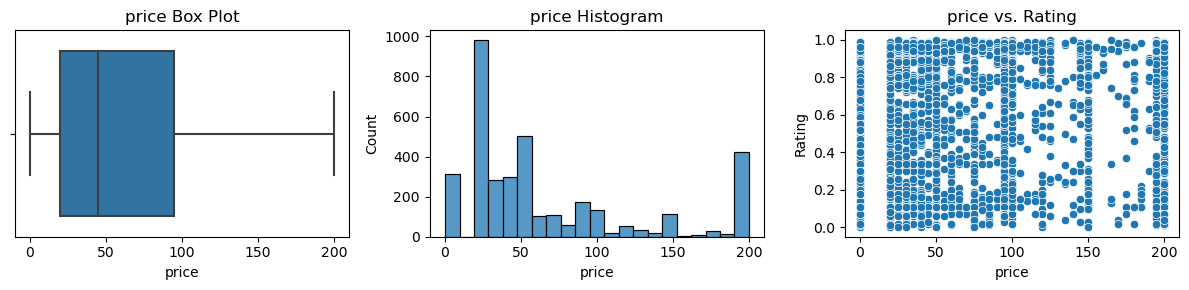

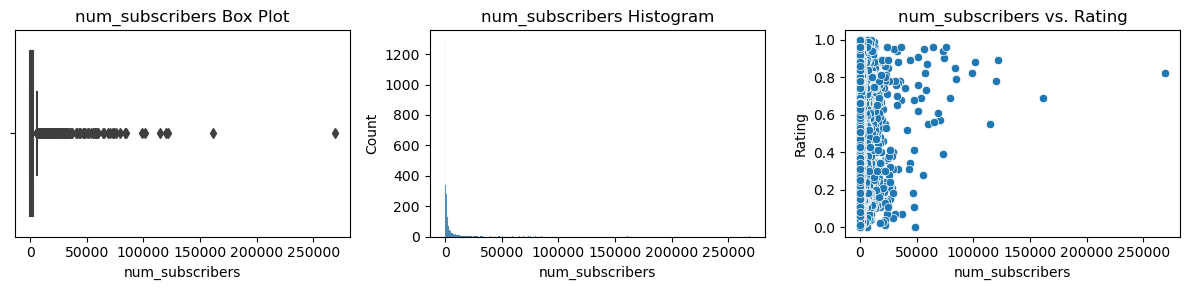

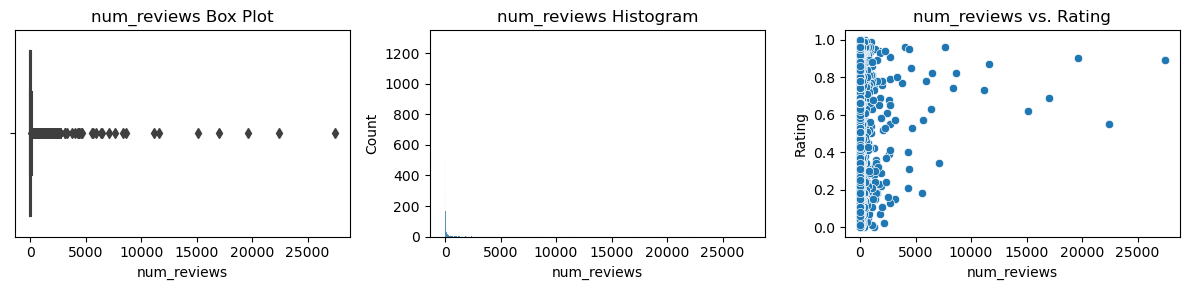

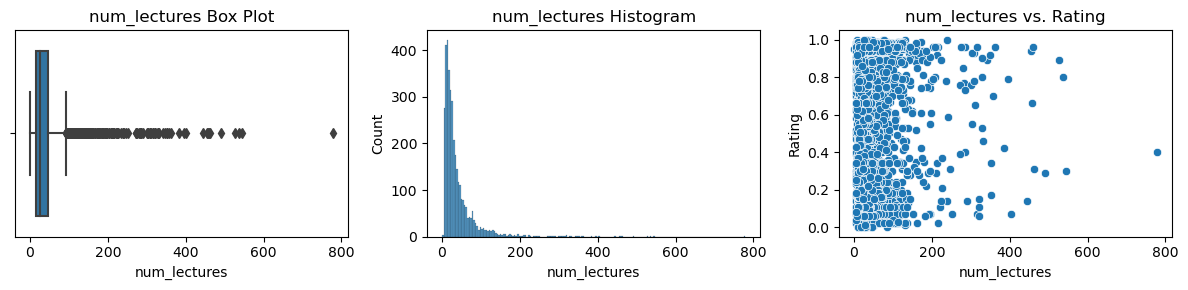

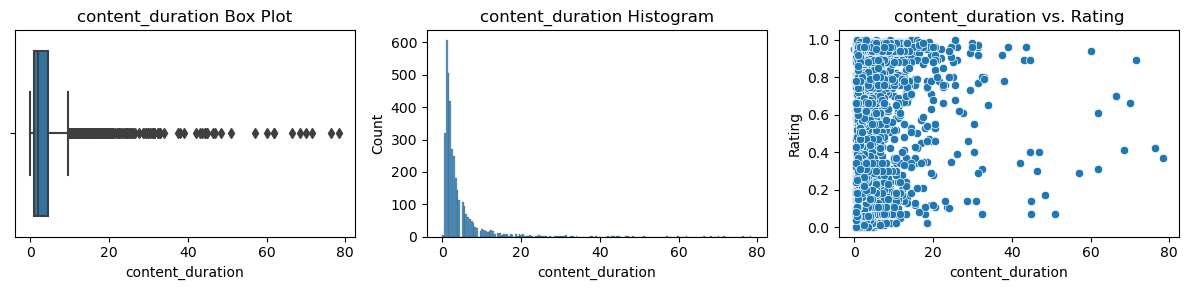

In [23]:
num_cols = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']


for col in num_cols:
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axs[0])
    axs[0].set_title(col + ' Box Plot')
    
    # Histogram
    sns.histplot(x=df[col], ax=axs[1])
    axs[1].set_title(col + ' Histogram')
    
    # Scatterplot
    sns.scatterplot(x=df[col], y=df['Rating'], ax=axs[2])
    axs[2].set_title(col + ' vs. Rating')
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [24]:

def calculate_outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers


for col in num_cols:
    outliers = calculate_outliers_iqr(df[col])
    num_outliers = len(outliers)
    percent_outliers = num_outliers / len(df) * 100
    print(col + ': ' + str(num_outliers) + ' outliers, ' + str(round(percent_outliers, 2)) + '%')

price: 0 outliers, 0.0%
num_subscribers: 434 outliers, 11.81%
num_reviews: 494 outliers, 13.44%
num_lectures: 291 outliers, 7.92%
content_duration: 313 outliers, 8.51%


In [25]:
cols_to_transform = [ 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
df[cols_to_transform] = df[cols_to_transform].apply(lambda x: np.log(x + 1))
print(df.head())

   price  num_subscribers  num_reviews  num_lectures  level  Rating  \
0    0.0        12.502184     9.063000      3.828641      1    0.82   
1    0.0        11.989346     5.634790      3.332205      3    0.69   
2  200.0        11.708369    10.219976      5.837730      1    0.89   
3    0.0        11.697677     8.686936      3.433987      4    0.78   
4  200.0        11.648444    10.017396      5.720312      1    0.55   

   content_duration  subject  
0          2.442347        3  
1          1.504077        3  
2          3.784190        3  
3          1.386294        3  
4          3.449988        3  


CHECKING FOR MULTICOLLINIARITY

In [26]:
X = df[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']]


vif_df = pd.DataFrame()


vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df['Feature'] = X.columns


print(vif_df)

         VIF           Feature
0   2.537072             price
1  18.688493   num_subscribers
2  10.813805       num_reviews
3  23.121077      num_lectures
4  12.843584  content_duration


Linear Regression

In [27]:
X = df[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'level', 'subject']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)


y_pred = model.predict(X_test_poly)


print('R-squared score:', r2_score(y_test, y_pred))

R-squared score: 0.08325436376588402


Decision Tree Regression

In [28]:
X = df[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'level', 'subject']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print('R-squared score:', r2_score(y_test, y_pred))

R-squared score: -0.09554244466030837


Random Forest Regression

In [29]:
features = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'level', 'subject']
target = 'Rating'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']),
    ('cat', cat_transformer, ['level', 'subject'])
])


model = RandomForestRegressor(n_estimators=100, random_state=42)


pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R-squared score:', r2_score(y_test, y_pred))
     

R-squared score: 0.3793051420621145
